In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# # Interactive plots
# %matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

timer = mypackage.utils.Timer()

TensorFlow version is 2.1.0


Using TensorFlow backend.


In [3]:
# # Load the labeled data
# X, Y, info = mypackage.Dataset.load("data/tomra_all", only_with_contaminant=True)
# _, X, _ = mypackage.Dataset.scale(None, X, scaler='GlobalStandardization')

# print(X.shape, (X.min(), X.max()))
# print(np.unique(Y, return_counts=True))

(65, 100, 100, 208) (-7.217623, 11.974456)
(array([0, 1, 2], dtype=int32), array([554285,  88543,   7172]))


In [3]:
# Load the labeled data
dataset_folder = 'data/tomra_all'
file_list = ["20200213_113826_fillet_sample30", "20200213_113854_fillet_sample31", "20200213_113925_fillet_sample32", "20200213_113949_fillet_sample33", "20200213_114007_fillet_sample34", "20200213_114025_fillet_sample35", "20200213_114052_fillet_sample36", "20200213_114111_fillet_sample37", "20200213_114129_fillet_sample38", "20200213_114148_fillet_sample39"]

X, Y = mypackage.Dataset.load_files(file_list, dataset_folder, with_labels=True)
_, X, _ = mypackage.Dataset.scale(None, X, scaler='GlobalStandardization')

print(X.shape, (X.min(), X.max()))
print(np.unique(Y, return_counts=True))

(10, 100, 100, 208) (-5.6958165, 5.4056025)
(array([0, 1, 2], dtype=int32), array([85141, 13856,  1003]))


In [20]:
# svm = mypackage.SGD(X[0:1], Y[0:1])
# svm.train(loss="hinge", penalty="l1", max_iter=100000000)
# Y_hat = svm.predict(X[1:2], Y[1:2]);

Start training for 0 - 20200213_113826_fillet_sample30
Start training
Elapsed time: 2692.6934 seconds
Predicting for train data
Elapsed time: 202.5469 seconds
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    151825
         1.0       0.98      0.97      0.98     30960
         2.0       0.97      0.84      0.90      1535

    accuracy                           0.99    184320
   macro avg       0.98      0.94      0.96    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for validation data
Elapsed time: 10.9576 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8510
           1       0.96      0.98      0.97      1406
           2       1.00      0.40      0.58        84

    accuracy                           0.99     10000
   macro avg       0.99      0.80      0.85     10000
weighted avg       0.99      0.99      0.99     10000

Start training for

Elapsed time: 11.8239 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8448
           1       0.98      0.94      0.96      1430
           2       0.97      0.91      0.94       122

    accuracy                           0.99     10000
   macro avg       0.98      0.95      0.96     10000
weighted avg       0.99      0.99      0.99     10000

Start training for 9 - 20200213_114148_fillet_sample39
Start training
Elapsed time: 200.2883 seconds
Predicting for train data
Elapsed time: 214.3078 seconds
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    148153
         1.0       0.97      0.98      0.98     33926
         2.0       0.97      0.80      0.87      2241

    accuracy                           0.99    184320
   macro avg       0.98      0.92      0.95    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for validation data
Elapsed time: 11.63

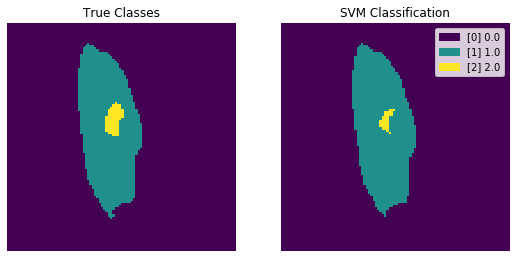

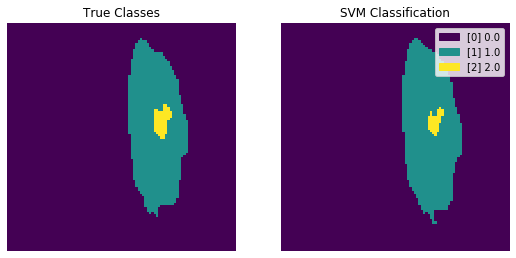

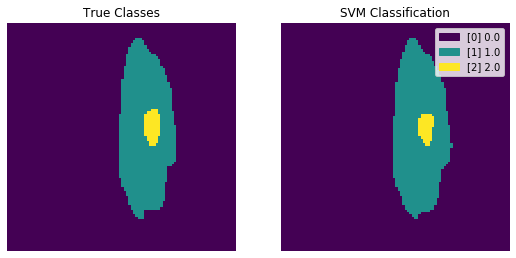

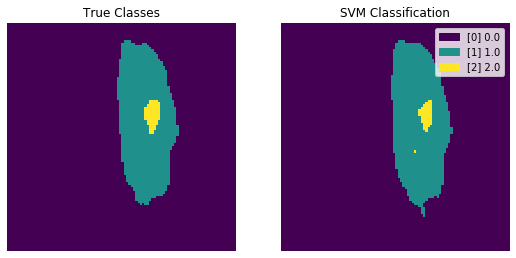

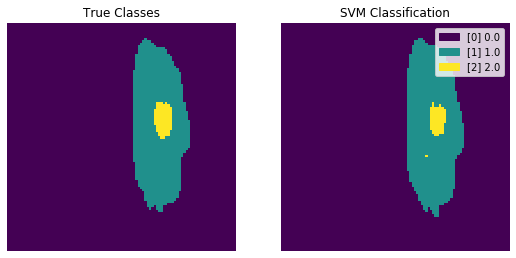

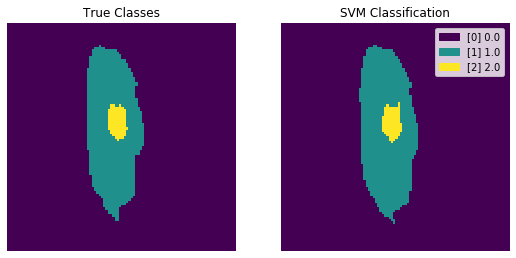

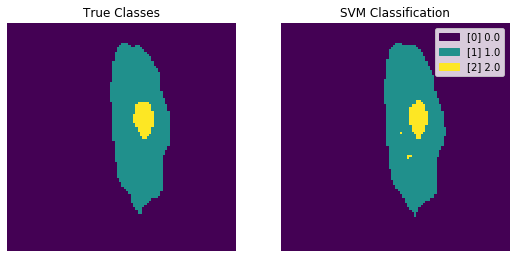

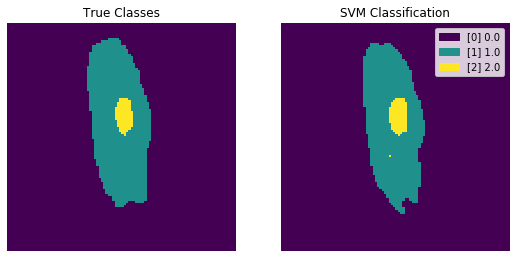

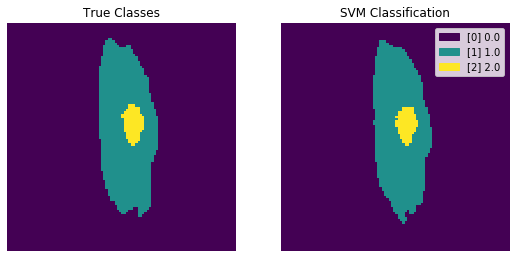

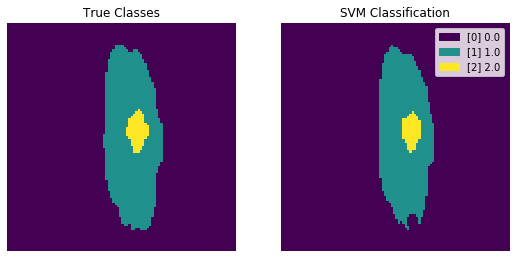

In [14]:
def select_one(X, i):
    return X[np.arange(len(X)) != i], X[i:i+1]

# i = 0
for i, file_name in enumerate(file_list): # [0, 23, 24, 31, 35, 57, 63]: # range(len(X))
#     Do CV on each image / Or on each set of 10 images

    X_rest, x_validation = select_one(X, i)
    Y_rest, y_validation = select_one(Y, i)
    X_train, Y_train = mypackage.Dataset.make_zoomed_in_dataset(X_rest, Y_rest, size=32, sample_multiplication=20, contaminant_type=2, zoom_with_noise=0.8)
    
    svm = mypackage.SVM(X_train, Y_train)
    print(f"Start training for {i} - {file_name}")
    svm.train()

    print("Predicting for train data")
    svm.predict(X_train, Y=Y_train, plot=False)

    print("Predicting for validation data")
    y_hat = svm.predict(x_validation, y_validation)
